In [2]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [3]:
#loading data_set:
diabetes_data = pd.read_csv("C:/Users/Arhum/Downloads/diabetes.csv")
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
print(diabetes_data.info())
print(diabetes_data.describe())
print(diabetes_data["Outcome"].value_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

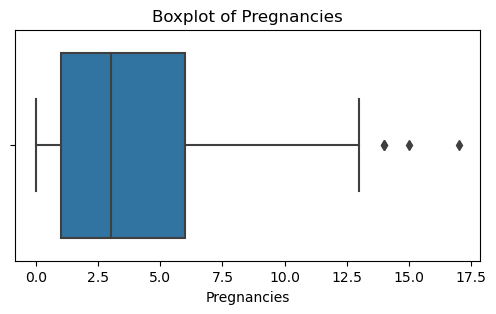

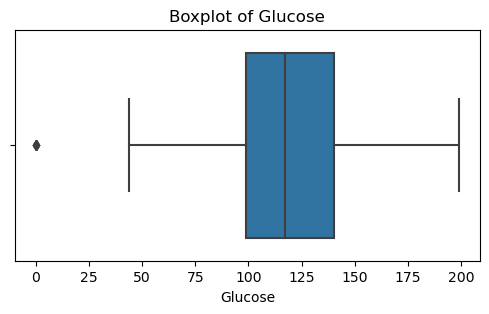

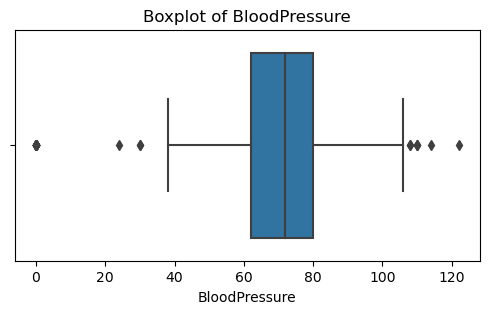

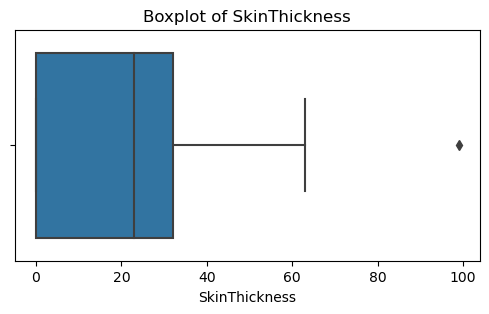

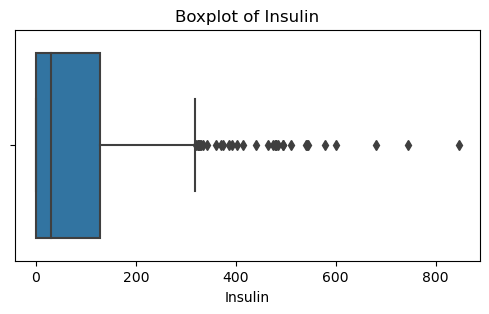

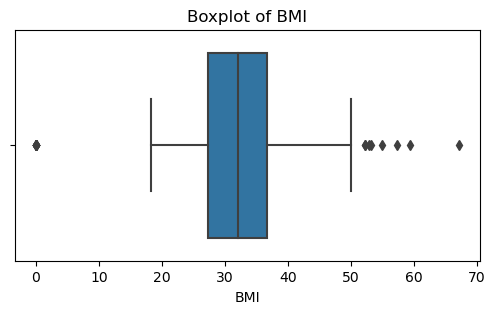

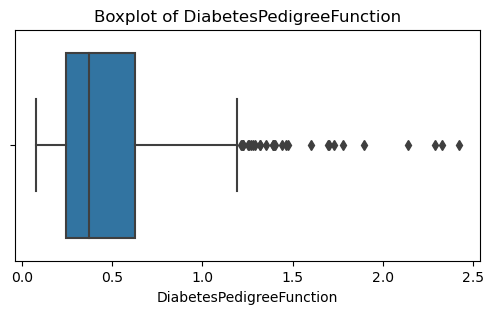

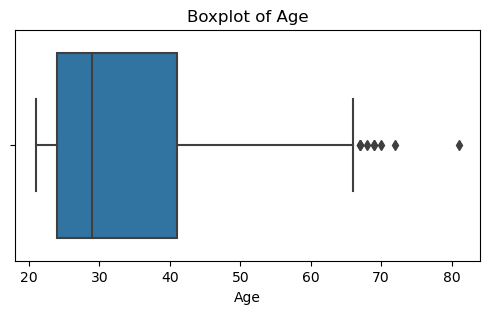

In [6]:
for col in diabetes_data.columns[:-1]:  # Exclude 'Outcome'
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=diabetes_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [7]:
diabetes_data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
X=diabetes_data.drop('Outcome',axis=1)
y=diabetes_data['Outcome']


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
svm_model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [20]:
y_pred = svm_model.predict(X_test)
print(y_pred)
y_proba = svm_model.predict_proba(X_test)[:, 1]

[1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 0]


In [18]:
y_proba

array([0.75306577, 0.18240216, 0.20380846, 0.32975678, 0.18205291,
       0.2492333 , 0.2939808 , 0.73376137, 0.08911863, 0.86368319,
       0.19637808, 0.79578051, 0.12466161, 0.18462807, 0.25594795,
       0.3601279 , 0.65619264, 0.08220997, 0.91589109, 0.24899776,
       0.24688   , 0.61525163, 0.14066088, 0.72911907, 0.45134184,
       0.13686924, 0.6862397 , 0.10137333, 0.26840279, 0.08140109,
       0.07317232, 0.11695181, 0.48662597, 0.64690041, 0.81563392,
       0.13774126, 0.2092193 , 0.10152255, 0.65352432, 0.54717579,
       0.5       , 0.47683521, 0.12222661, 0.31594466, 0.16996653,
       0.34217042, 0.18342602, 0.09444339, 0.63872993, 0.70190022,
       0.39065296, 0.82216912, 0.4185757 , 0.09832585, 0.50713607,
       0.38394121, 0.7646988 , 0.20388376, 0.80208864, 0.16424358,
       0.73067777, 0.20077452, 0.16163951, 0.91079736, 0.08420251,
       0.40363366, 0.79871891, 0.09890882, 0.34439651, 0.61415697,
       0.12531786, 0.07317063, 0.28613434, 0.65234333, 0.10231